In [68]:
#importing libraries
import pandas as pd
import numpy as np
import os 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta

In [69]:
#LOADING DATA
filename = os.path.join(os.getcwd(), "/Users/saanavigoyal/Desktop/Break Through Tech /fraudTest.csv")
test=pd.read_csv(filename,low_memory=False)

filename =os.path.join(os.getcwd(), "/Users/saanavigoyal/Desktop/Break Through Tech /fraudTrain.csv")
train=pd.read_csv(filename,low_memory=False)


In [70]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [71]:
train.shape

(1296675, 23)

In [72]:
test.shape

(555719, 23)

In [73]:
#changing gender to 1 and 2 int
test['gender'] = test['gender'].replace({'M':1, 'F': 0})
test['gender'].unique()

train['gender'] = train['gender'].replace({'M':1, 'F': 0})
train['gender'].unique()


array([0, 1])

In [74]:
#determining age from time of transaction
train[['Trans_Date', 'Trans_Time']] = train['trans_date_trans_time'].str.split(' ', n=1).tolist()

train['dob'] = pd.to_datetime(train['dob'])
train['Trans_Date'] = pd.to_datetime(train['Trans_Date'])
train['Age'] = train.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


train.drop(columns=['dob'], inplace=True, axis=1)


test[['Trans_Date', 'Trans_Time']] = test['trans_date_trans_time'].str.split(' ', n=1).tolist()

test['dob'] = pd.to_datetime(test['dob'])
test['Trans_Date'] = pd.to_datetime(test['Trans_Date'])
test['Age'] = test.apply(lambda row: relativedelta(row['Trans_Date'], row['dob']).years, axis=1)


test.drop(columns=['dob'], inplace=True, axis=1)

In [75]:
#creating new loaction feature from lat and long

train['location_matches'] = np.where((abs(train['lat'] - train['merch_lat']) < 0.5) & (abs(train['long'] - train['merch_long']) < 0.5), True, False)

#dropping the lat,long,merch lat, and merch long
train.drop('lat', inplace=True, axis=1)
train.drop('long', inplace=True, axis=1)
train.drop('merch_long', inplace=True, axis=1)
train.drop('merch_lat', inplace=True, axis=1)


test['location_matches'] = np.where((abs(test['lat'] - test['merch_lat']) < 0.5) & (abs(test['long'] - test['merch_long']) < 0.5), True, False)

test.drop('lat', inplace=True, axis=1)
test.drop('long', inplace=True, axis=1)
test.drop('merch_long', inplace=True, axis=1)
test.drop('merch_lat', inplace=True, axis=1)

In [76]:
# Convert string datetime to pandas datetime format for later use
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['hour'] = train['trans_date_trans_time'].dt.hour
train['minute'] = train['trans_date_trans_time'].dt.minute
train['second'] = train['trans_date_trans_time'].dt.second

# Drop the original datetime column
train = train.drop(columns=['trans_date_trans_time'])


# Convert string datetime to pandas datetime format
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute
test['second'] = test['trans_date_trans_time'].dt.second

# Drop the original datetime column
test = test.drop(columns=['trans_date_trans_time'])

In [77]:
train.dtypes

Unnamed: 0                   int64
cc_num                       int64
merchant                    object
category                    object
amt                        float64
first                       object
last                        object
gender                       int64
street                      object
city                        object
state                       object
zip                          int64
city_pop                     int64
job                         object
trans_num                   object
unix_time                    int64
is_fraud                     int64
Trans_Date          datetime64[ns]
Trans_Time                  object
Age                          int64
location_matches              bool
year                         int32
month                        int32
day                          int32
hour                         int32
minute                       int32
second                       int32
dtype: object

In [78]:
#one hot encoding for category
train = pd.get_dummies(train, columns=['category'])


In [79]:
test = pd.get_dummies(test, columns=['category'])

In [80]:
#dropping columns that are not needed
columns_to_drop = ['Unnamed: 0','cc_num','city','year','minute','second','trans_num','Trans_Time','first','last','street','state','merchant','job','Trans_Date','gender']
train =train.drop(columns=columns_to_drop)
test =test.drop(columns=columns_to_drop)

In [81]:
train.dtypes

amt                        float64
zip                          int64
city_pop                     int64
unix_time                    int64
is_fraud                     int64
Age                          int64
location_matches              bool
month                        int32
day                          int32
hour                         int32
category_entertainment        bool
category_food_dining          bool
category_gas_transport        bool
category_grocery_net          bool
category_grocery_pos          bool
category_health_fitness       bool
category_home                 bool
category_kids_pets            bool
category_misc_net             bool
category_misc_pos             bool
category_personal_care        bool
category_shopping_net         bool
category_shopping_pos         bool
category_travel               bool
dtype: object

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, recall_score, f1_score, precision_score

In [83]:
#X_train and X_test

X_train=train.drop('is_fraud',axis=1)
Y_train=train['is_fraud']

X_test=test.drop('is_fraud',axis=1)
Y_test=test['is_fraud']

In [84]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(X_train, Y_train)

df_train = pd.concat([pd.DataFrame(x_res), pd.Series(y_res, name='is_fraud')], axis=1)

# Display new class counts
df_train['is_fraud'].value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

In [85]:
# Applying SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(X_test, Y_test)

df_test = pd.concat([pd.DataFrame(x_res), pd.Series(y_res, name='is_fraud')], axis=1)

# Display new class counts
df_test['is_fraud'].value_counts()

is_fraud
0    553574
1    553574
Name: count, dtype: int64

In [86]:
#X_train and X_test
X_train=df_train.drop('is_fraud',axis=1)
Y_train=df_train['is_fraud']

X_test=df_test.drop('is_fraud',axis=1)
Y_test=df_test['is_fraud']

In [87]:
#overweighted sampling

In [88]:
from sklearn.utils.class_weight import compute_class_weight

weights = np.where(train['is_fraud'] == 1, 10, 1)
sample_size = 1296675
train = train.sample(n=sample_size, replace=True, weights=weights)
print(train['is_fraud'].value_counts())

is_fraud
0    1225091
1      71584
Name: count, dtype: int64


In [89]:
#Random Forest
rf_classifier = RandomForestClassifier(class_weight=dict(enumerate(weights)))
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)

In [90]:
print(y_pred)

[0 0 0 ... 1 1 1]


In [91]:
#accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("Confusion Matrix:")
print(cm)

#false positive, false negative, true positive, true negative
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

#precision, recall, f1
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9747215367773775
Confusion Matrix:
[[553349    225]
 [ 27762 525812]]
True Negatives (TN): 553349
False Positives (FP): 225
False Negatives (FN): 27762
True Positives (TP): 525812
Precision: 0.9995722734332376
Recall: 0.9498495232796338
F1-score: 0.9740767739491354


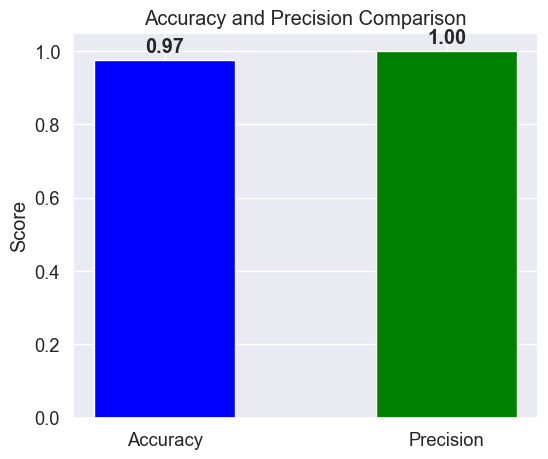

In [92]:
#Accuracy and Precision Visualization
labels = ['Accuracy', 'Precision']
values = [accuracy, precision]

plt.figure(figsize=(6,5))
plt.bar(labels, values, color=['blue', 'green'], width = 0.5)
plt.ylabel('Score')
plt.title('Accuracy and Precision Comparison')


for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()

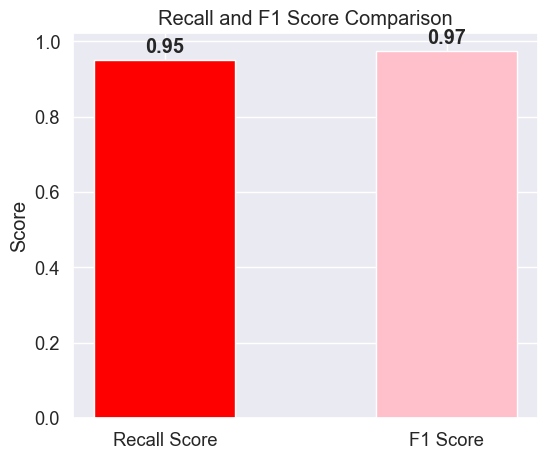

In [93]:
#Recall and F1 Score Visualization

labels = ['Recall Score', 'F1 Score']
values = [recall, f1]

plt.figure(figsize=(6,5))
plt.bar(labels, values, color=['red', 'pink'], width = 0.5)
plt.ylabel('Score')
plt.title('Recall and F1 Score Comparison')


for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()

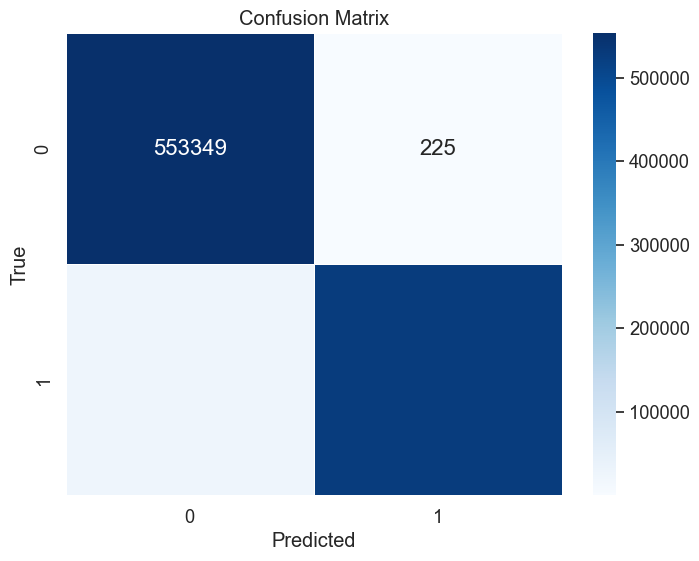

In [94]:
#confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [95]:
%pip install xgboost
%pip list

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Package             Version
------------------- ------------
altgraph            0.17.2
appnope             0.1.3
asttokens           2.4.0
backcall            0.2.0
comm                0.1.4
contourpy           1.1.1
cycler              0.11.0
debugpy             1.8.0
decorator           5.1.1
exceptiongroup      1.1.3
executing           1.2.0
fonttools           4.42.1
future              0.18.2
imbalanced-learn    0.11.0
importlib-metadata  6.8.0
importlib-resources 6.1.0
ipykernel           6.25.2
ipython             8.15.0
jedi                0.19.0
joblib              1.3.2
jupyter_client      8.3.1
jupyter_core        5.3.1
kiwisolver          1.4.5
macholib            1.15.2
matplotlib          3.8.0
matplo

In [96]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [97]:
from xgboost import XGBClassifier

xgboosting_model = XGBClassifier(class_weight=dict(enumerate(weights)))
xgboosting_model.fit(X_train, Y_train)
y_pred = xgboosting_model.predict(X_test)

/Users/saanavigoyal/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [11:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [98]:
#accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

#confusion matrix
cm = confusion_matrix(Y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("Confusion Matrix:")
print(cm)

#false positive, false negative, true positive, true negative
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

#precision, recall, f1
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9949618298547258
Confusion Matrix:
[[551958   1616]
 [  3962 549612]]
True Negatives (TN): 551958
False Positives (FP): 1616
False Negatives (FN): 3962
True Positives (TP): 549612
Precision: 0.9970683637260807
Recall: 0.9928428719556915
F1-score: 0.9949511315149684


<Axes: >

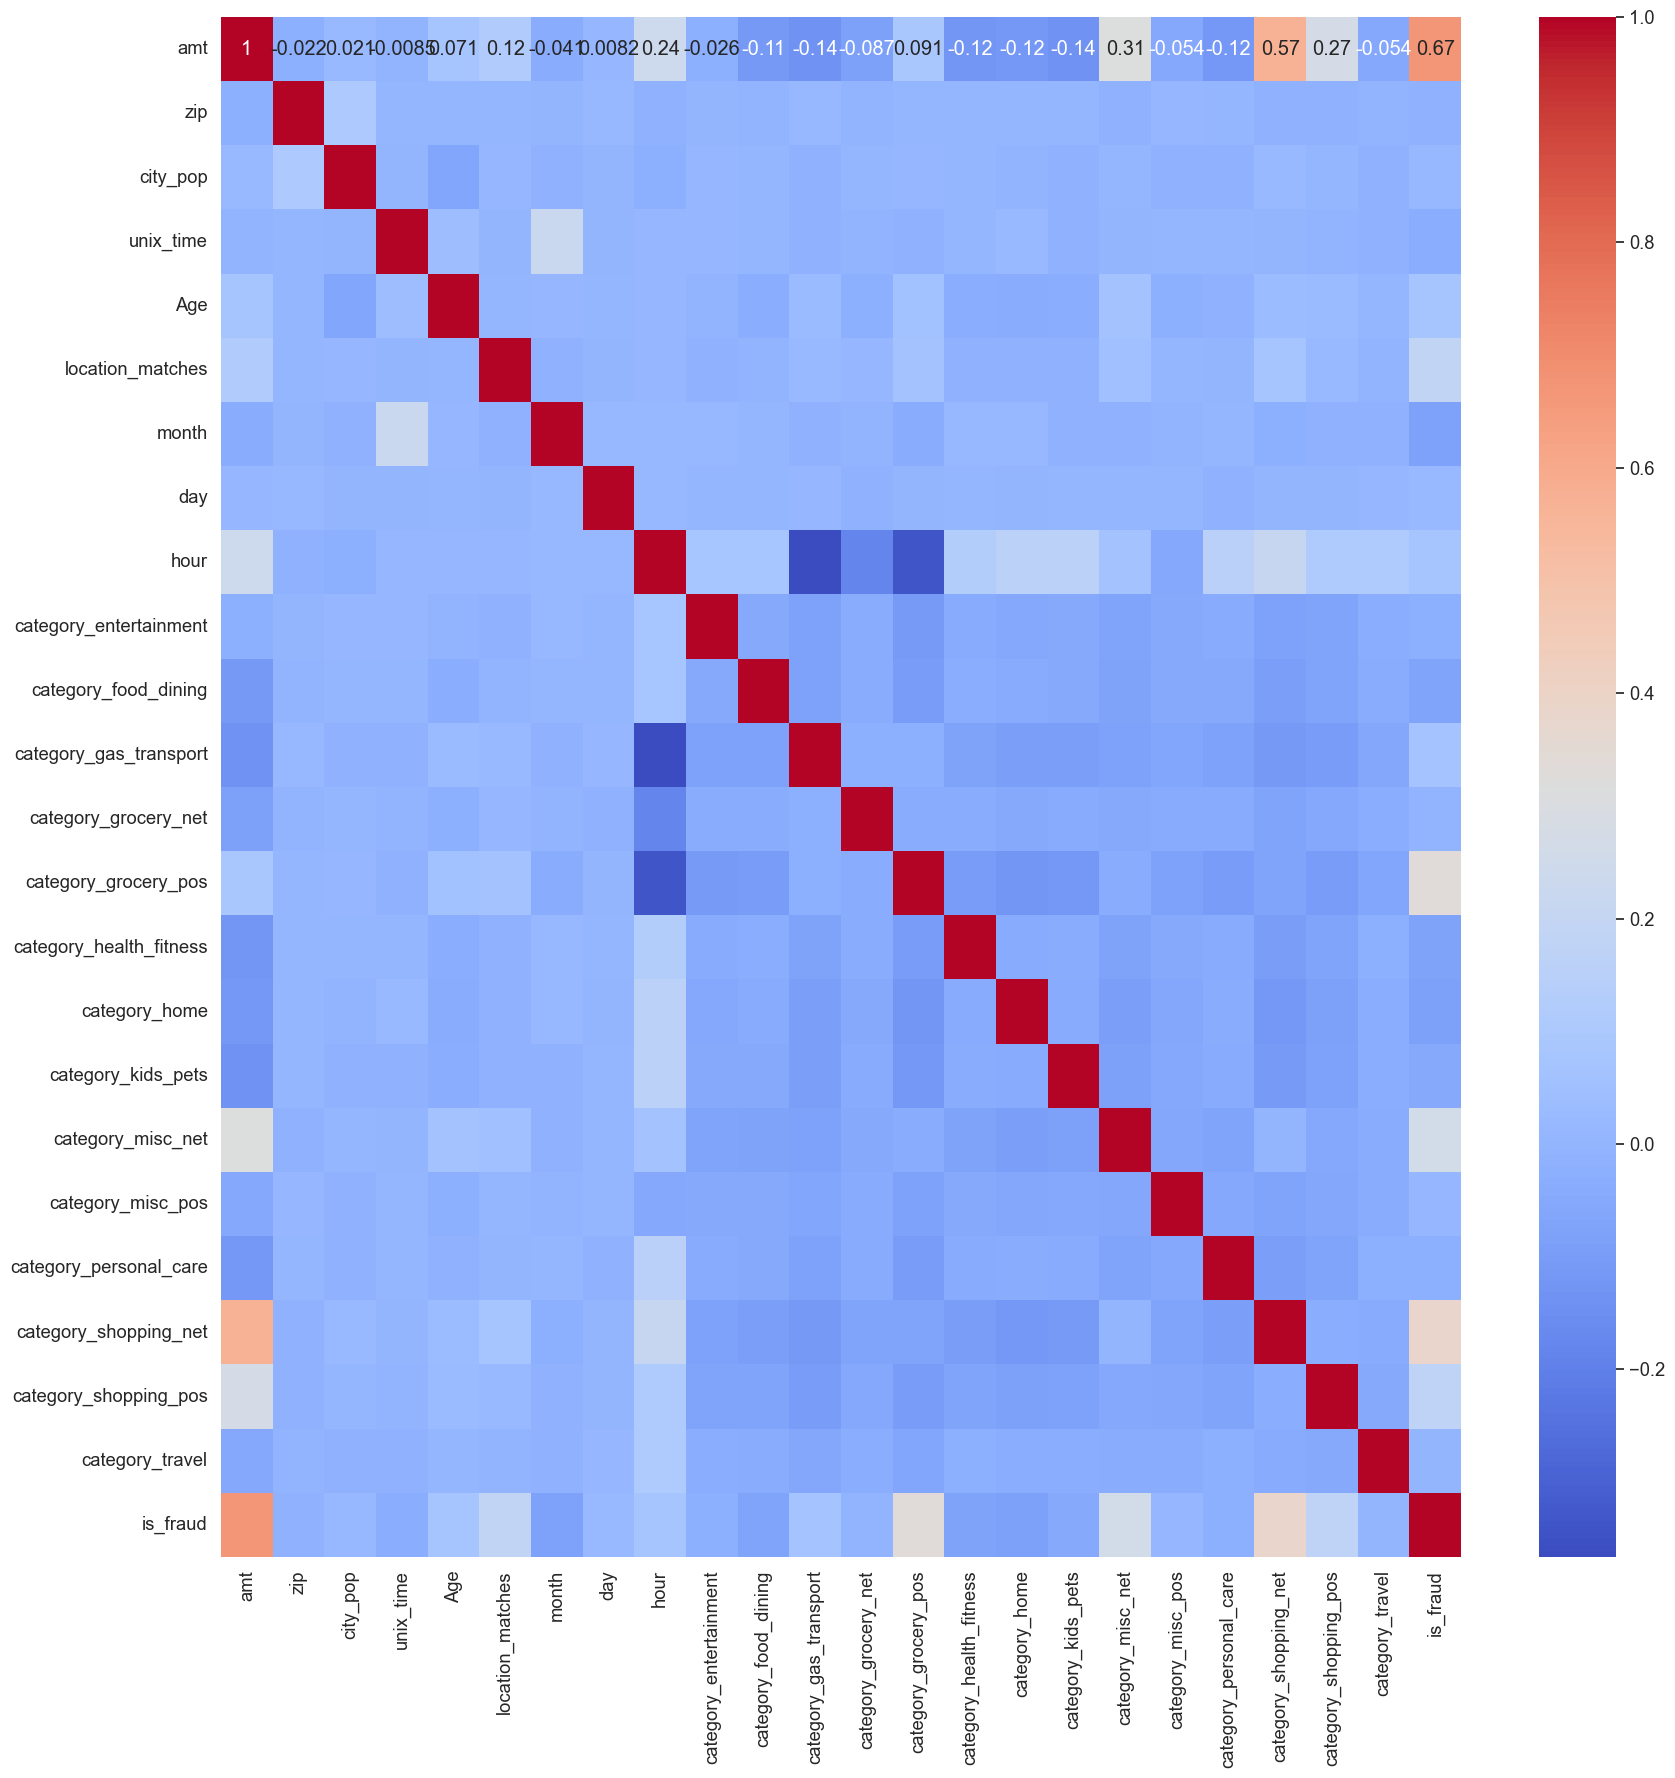

In [99]:
# Heatmap
plt.figure(figsize=[20,20])
sns.heatmap( df_train.corr(numeric_only=True),annot=True, cmap='coolwarm')

In [100]:
test.corr(numeric_only=True) 

,amt,zip,city_pop,unix_time,is_fraud,Age,location_matches,month,day,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
amt,1.000000,0.002310,0.002760,-0.000974,0.182267,-0.012864,0.001026,-0.000717,-0.000829,-0.029860,...,0.095858,-0.026328,-0.023448,-0.023499,0.013369,-0.011849,-0.037254,0.025627,0.014950,0.049389
zip,0.002310,1.000000,0.075571,0.001395,-0.002271,0.008283,-0.001031,0.001401,-0.000168,0.005966,...,-0.000483,0.001961,-0.002445,0.000420,0.003005,-0.004342,0.002701,0.007227,0.000285,-0.001303
city_pop,0.002760,0.075571,1.000000,-0.000740,-0.004910,-0.091733,-0.000497,-0.001117,0.001938,0.018937,...,-0.003473,-0.002742,-0.003174,0.001100,-0.003436,0.005423,-0.001508,0.002411,0.011438,-0.000691
unix_time,-0.000974,0.001395,-0.000740,1.000000,-0.013066,0.006830,0.001000,0.988955,0.044348,-0.000304,...,-0.000029,-0.000565,0.002446,-0.000891,0.000692,-0.000943,0.000908,-0.002036,0.002730,-0.001183
is_fraud,0.182267,-0.002271,-0.004910,-0.013066,1.000000,0.007334,0.000343,-0.011748,-0.009203,0.011686,...,0.027982,-0.010468,-0.013417,-0.012619,0.021642,-0.007383,-0.009257,0.037941,0.002115,-0.004551
Age,-0.012864,0.008283,-0.091733,0.006830,0.007334,1.000000,-0.000292,0.007967,-0.002373,-0.173695,...,0.016243,-0.001242,0.015517,0.023984,0.001437,-0.029438,0.016980,-0.018183,-0.017079,0.023434
location_matches,0.001026,-0.001031,-0.000497,0.001000,0.000343,-0.000292,1.000000,0.001227,-0.001621,0.000656,...,-0.000539,0.000532,-0.000100,0.000631,0.000704,0.000042,0.001690,-0.002243,-0.000191,0.001952
month,-0.000717,0.001401,-0.001117,0.988955,-0.011748,0.007967,0.001227,1.000000,-0.104058,-0.004995,...,0.001476,-0.001323,0.001587,-0.002100,0.001660,-0.000678,-0.000125,-0.001950,0.002798,-0.001833
day,-0.000829,-0.000168,0.001938,0.044348,-0.009203,-0.002373,-0.001621,-0.104058,1.000000,-0.000161,...,0.000470,-0.000597,-0.001337,0.001367,-0.001255,0.000801,0.000943,-0.000047,-0.000596,0.000404
hour,-0.029860,0.005966,0.018937,-0.000304,0.011686,-0.173695,0.000656,-0.004995,-0.000161,1.000000,...,-0.335816,0.182472,0.222705,0.212772,-0.168103,-0.080307,0.190671,-0.014840,0.000981,0.124404


In [101]:
#correlation 
train.corr(numeric_only=True) 

,amt,zip,city_pop,unix_time,is_fraud,Age,location_matches,month,day,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
amt,1.000000,-0.002851,0.009985,-0.006035,0.508917,0.014451,-0.000739,-0.016423,0.004072,0.049183,...,0.073325,-0.049878,-0.049352,-0.053376,0.082472,-0.032801,-0.060074,0.172439,0.053718,0.017604
zip,-0.002851,1.000000,0.081466,0.001926,-0.006918,0.010293,0.001186,0.000686,0.001421,0.003297,...,-0.000849,0.002447,0.000627,-0.001213,0.001849,-0.005039,0.004376,0.005155,-0.000419,-0.003527
city_pop,0.009985,0.081466,1.000000,-0.000704,0.006551,-0.090266,0.001208,-0.000780,0.001247,0.015108,...,-0.001820,-0.003580,-0.003411,-0.003210,0.000462,0.004412,-0.001764,0.005503,0.010408,-0.001294
unix_time,-0.006035,0.001926,-0.000704,1.000000,-0.017022,0.021058,0.002282,0.190285,0.014985,0.001825,...,-0.001911,-0.000484,0.002788,0.000566,-0.000013,0.001399,0.001158,0.000405,-0.002690,-0.001528
is_fraud,0.508917,-0.006918,0.006551,-0.017022,1.000000,0.036807,-0.002230,-0.037371,0.010343,0.042213,...,0.103784,-0.045772,-0.055140,-0.045988,0.079085,-0.027643,-0.037525,0.127683,0.018438,-0.021236
Age,0.014451,0.010293,-0.090266,0.021058,0.036807,1.000000,0.000639,0.006538,0.001268,-0.148801,...,0.023043,-0.004158,0.010253,0.016167,0.010015,-0.028212,0.012631,-0.011086,-0.014267,0.019490
location_matches,-0.000739,0.001186,0.001208,0.002282,-0.002230,0.000639,1.000000,-0.001102,0.000263,0.000467,...,-0.000388,0.000992,0.000521,-0.000202,-0.000413,-0.000363,0.000920,-0.001428,0.000108,-0.000895
month,-0.016423,0.000686,-0.000780,0.190285,-0.037371,0.006538,-0.001102,1.000000,0.013475,-0.001552,...,-0.005625,-0.000709,0.003150,0.001988,-0.003920,0.001230,0.002475,-0.001423,-0.001510,-0.000443
day,0.004072,0.001421,0.001247,0.014985,0.010343,0.001268,0.000263,0.013475,1.000000,0.001825,...,0.001164,0.001512,-0.001645,-0.001606,0.000815,0.001613,-0.003316,0.002134,-0.000344,0.000925
hour,0.049183,0.003297,0.015108,0.001825,0.042213,-0.148801,0.000467,-0.001552,0.001825,1.000000,...,-0.343154,0.175732,0.212970,0.204292,-0.133443,-0.077481,0.183071,0.023442,0.014554,0.120303
